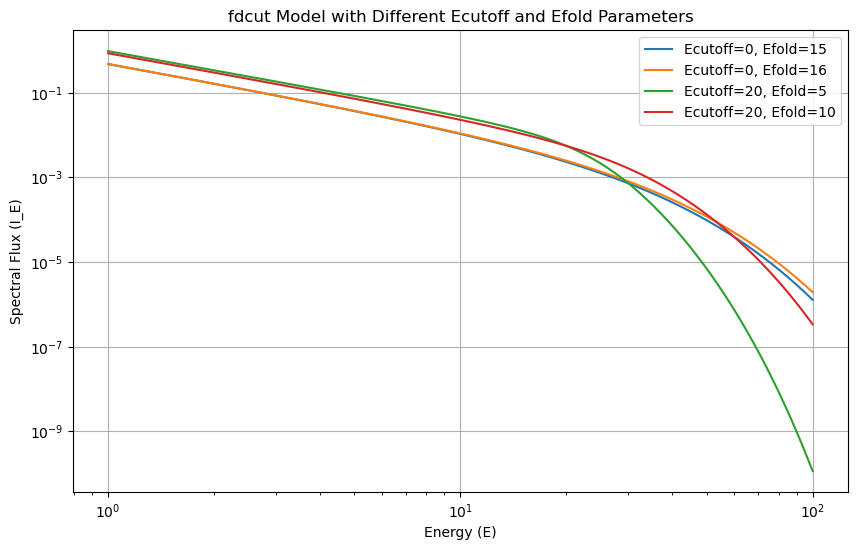

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# fdcut模型函数定义
def fdcut(E, K, Gamma, Ecutoff, Efold):
    return K * E**(-Gamma) / (1 + np.exp((E - Ecutoff) / Efold))

# 能量范围
E = np.logspace(0, 2, 500)  # 从1到100的能量范围

# 模型参数
K = 1
Gamma = 1.5

# 不同的Ecutoff和Efold参数
params = [(0,15),(0,16),
    (20, 5),
    (20, 10),
]

# 绘图
plt.figure(figsize=(10, 6))
for Ecutoff, Efold in params:
    spectrum = fdcut(E, K, Gamma, Ecutoff, Efold)
    plt.plot(E, spectrum, label=f'Ecutoff={Ecutoff}, Efold={Efold}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (E)')
plt.ylabel('Spectral Flux (I_E)')
plt.title('fdcut Model with Different Ecutoff and Efold Parameters')
plt.legend()
plt.grid(True)
plt.show()

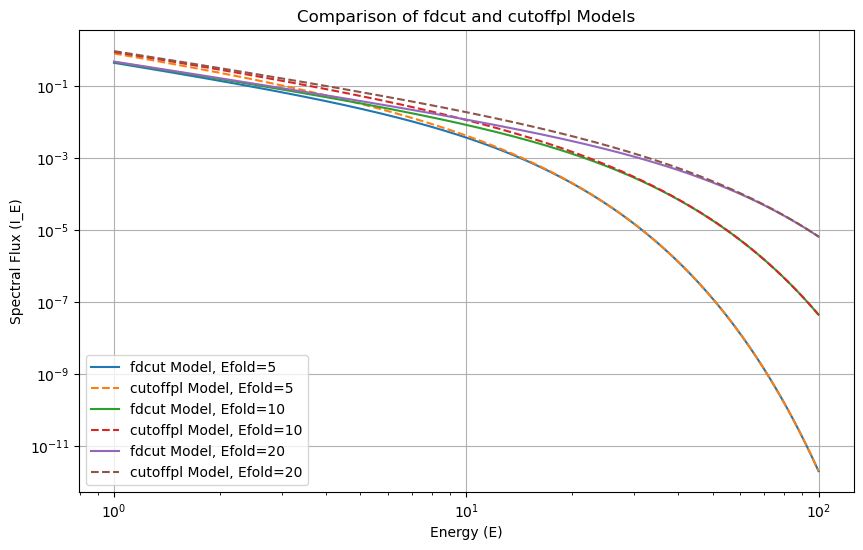

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# fdcut模型函数定义
def fdcut(E, K, Gamma, Efold):
    return K * E**(-Gamma) / (1 + np.exp(E / Efold))

# cutoffpl模型函数定义
def cutoffpl(E, K, Gamma, Efold):
    return K * E**(-Gamma) * np.exp(-E / Efold)

# 能量范围
E = np.logspace(0, 2, 500)  # 从1到100的能量范围

# 固定参数
K = 1
Gamma = 1.5
Efold_values = [5, 10, 20]  # 不同的Efold参数值

# 绘图
plt.figure(figsize=(10, 6))
for Efold in Efold_values:
    spectrum_fdcut = fdcut(E, K, Gamma, Efold)
    spectrum_cutoffpl = cutoffpl(E, K, Gamma, Efold)
    
    plt.plot(E, spectrum_fdcut, label=f'fdcut Model, Efold={Efold}')
    plt.plot(E, spectrum_cutoffpl, label=f'cutoffpl Model, Efold={Efold}', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (E)')
plt.ylabel('Spectral Flux (I_E)')
plt.title('Comparison of fdcut and cutoffpl Models')
plt.legend()
plt.grid(True)
plt.show()

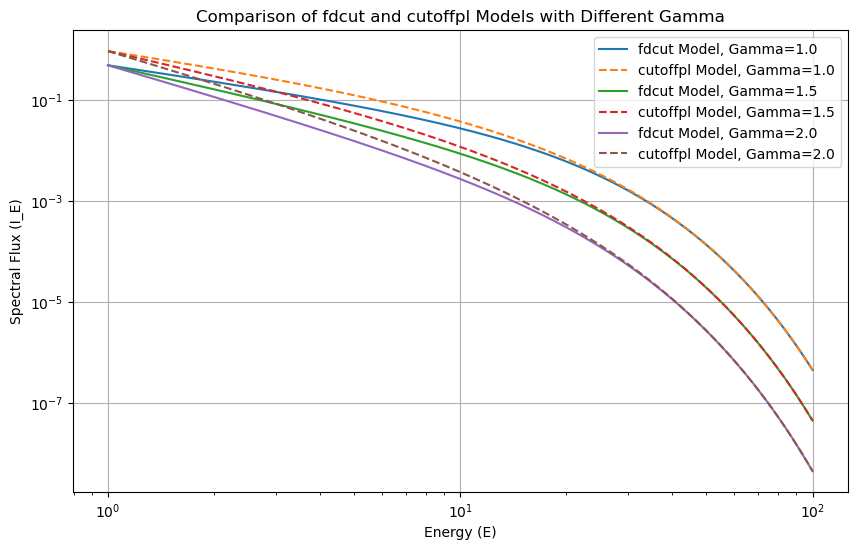

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# fdcut模型函数定义
def fdcut(E, K, Gamma, Efold):
    return K * E**(-Gamma) / (1 + np.exp(E / Efold))

# cutoffpl模型函数定义
def cutoffpl(E, K, Gamma, Efold):
    return K * E**(-Gamma) * np.exp(-E / Efold)

# 能量范围
E = np.logspace(0, 2, 500)  # 从1到100的能量范围

# 固定参数
K = 1
Efold = 10  # 固定Efold参数
Gamma_values = [1.0, 1.5, 2.0]  # 不同的Gamma参数值

# 绘图
plt.figure(figsize=(10, 6))
for Gamma in Gamma_values:
    spectrum_fdcut = fdcut(E, K, Gamma, Efold)
    spectrum_cutoffpl = cutoffpl(E, K, Gamma, Efold)
    
    plt.plot(E, spectrum_fdcut, label=f'fdcut Model, Gamma={Gamma}')
    plt.plot(E, spectrum_cutoffpl, label=f'cutoffpl Model, Gamma={Gamma}', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (E)')
plt.ylabel('Spectral Flux (I_E)')
plt.title('Comparison of fdcut and cutoffpl Models with Different Gamma')
plt.legend()
plt.grid(True)
plt.show()

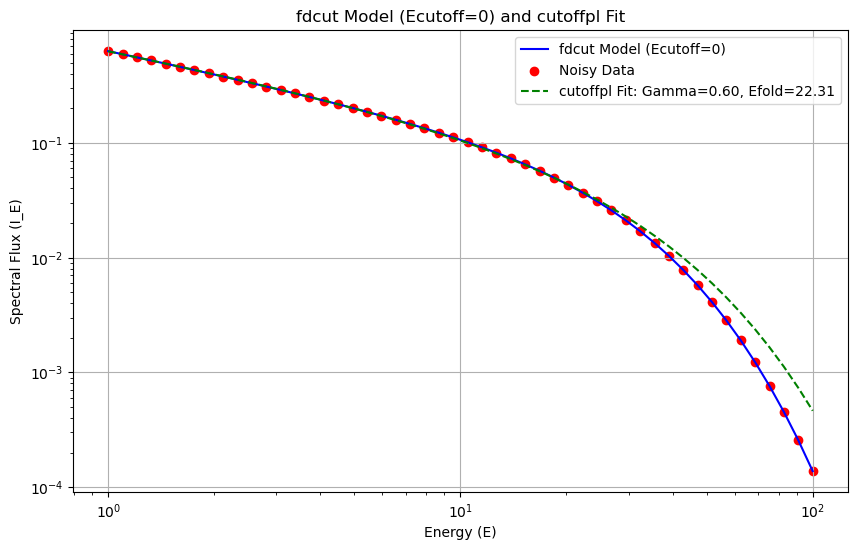

Fitted parameters: K=0.6562679305416398, Gamma=0.6027068269966273, Efold=22.308749879098524


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# fdcut模型函数定义
def fdcut(E, K, Gamma, Efold):
    return K * E**(-Gamma) / (1 + np.exp(E / Efold))

# cutoffpl模型函数定义
def cutoffpl(E, K, Gamma, Efold):
    return K * E**(-Gamma) * np.exp(-E / Efold)

# 能量范围
E = np.logspace(0, 2, 50)  # 从1到100的能量范围

# 固定参数
K = 1.3
Gamma_fdcut = 0.63
Efold_fdcut = 16

# 使用fdcut模型生成数据点
spectrum_fdcut = fdcut(E, K, Gamma_fdcut, Efold_fdcut)

spectrum_fdcut_noisy = spectrum_fdcut

# 拟合cutoffpl模型
popt, pcov = curve_fit(cutoffpl, E, spectrum_fdcut_noisy, p0=[0.56, 0.45, 16])
K_fit, Gamma_fit, Efold_fit = popt

# 使用拟合参数绘制cutoffpl模型
spectrum_cutoffpl_fit = cutoffpl(E, K_fit, Gamma_fit, Efold_fit)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(E, spectrum_fdcut, label='fdcut Model (Ecutoff=0)', color='blue')
plt.scatter(E, spectrum_fdcut_noisy, label='Noisy Data', color='red')
plt.plot(E, spectrum_cutoffpl_fit, label=f'cutoffpl Fit: Gamma={Gamma_fit:.2f}, Efold={Efold_fit:.2f}', linestyle='--', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (E)')
plt.ylabel('Spectral Flux (I_E)')
plt.title('fdcut Model (Ecutoff=0) and cutoffpl Fit')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f"Fitted parameters: K={K_fit}, Gamma={Gamma_fit}, Efold={Efold_fit}")